In [1]:

import numpy as np
import pandas as pd

## Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Machine Learning Libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

## Regression Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Cross Val Score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
data[data['specialisation'] == 'Mkt&Fin']

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,208,M,83.33,Central,78.00,Others,Commerce,61.00,Comm&Mgmt,Yes,88.56,Mkt&Fin,71.55,Placed,300000.0
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.00,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.00,Mkt&Fin,53.62,Placed,275000.0


In [5]:
## Info About Dataset,j
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
## Students which are not placed has salary 0.
data['salary'] = data['salary'].replace(to_replace = np.nan, value= 0.0)

In [8]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [9]:
def remove_duplicates(data):
    data.drop_duplicates(keep='first',inplace=True)
    return "Checked Duplicates"
remove_duplicates(data)

'Checked Duplicates'

## Explore Categorical Columns

In [10]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [11]:
categorical_columns

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [12]:
def more_info_cate_data(dataset, categorical_col):
    for index, col_name in enumerate(categorical_col):
        print(categorical_col[index],'=', tuple(dataset[col_name].unique()))

In [13]:
more_info_cate_data(data, categorical_columns)

gender = ('M', 'F')
ssc_b = ('Others', 'Central')
hsc_b = ('Others', 'Central')
hsc_s = ('Commerce', 'Science', 'Arts')
degree_t = ('Sci&Tech', 'Comm&Mgmt', 'Others')
workex = ('No', 'Yes')
specialisation = ('Mkt&HR', 'Mkt&Fin')
status = ('Placed', 'Not Placed')


In [14]:
## More Info About Categorical Data

def more_info_cate_data(dataset, categorical_col):
    for index, col_name in enumerate(categorical_col):
        print('Total Number of Unique Variables in ',categorical_col[index],'columns is',dataset[col_name].nunique() ,'its Unique values are', dataset[col_name].unique())
        print(dataset[col_name].value_counts())
        print('*'*100)

In [15]:
more_info_cate_data(data, categorical_columns)

Total Number of Unique Variables in  gender columns is 2 its Unique values are ['M' 'F']
M    139
F     76
Name: gender, dtype: int64
****************************************************************************************************
Total Number of Unique Variables in  ssc_b columns is 2 its Unique values are ['Others' 'Central']
Central    116
Others      99
Name: ssc_b, dtype: int64
****************************************************************************************************
Total Number of Unique Variables in  hsc_b columns is 2 its Unique values are ['Others' 'Central']
Others     131
Central     84
Name: hsc_b, dtype: int64
****************************************************************************************************
Total Number of Unique Variables in  hsc_s columns is 3 its Unique values are ['Commerce' 'Science' 'Arts']
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64
***********************************************************************

## Visualize the Categorical columns

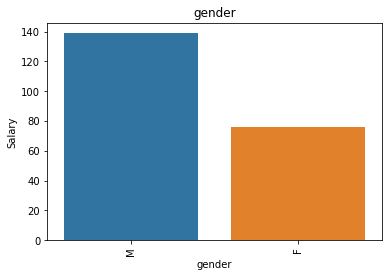

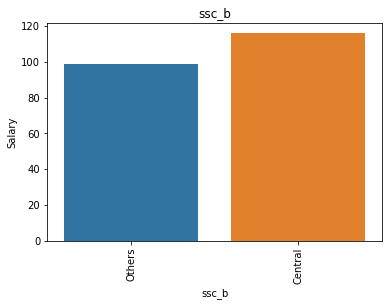

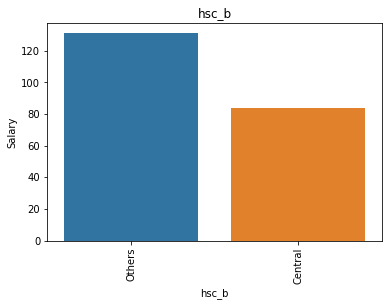

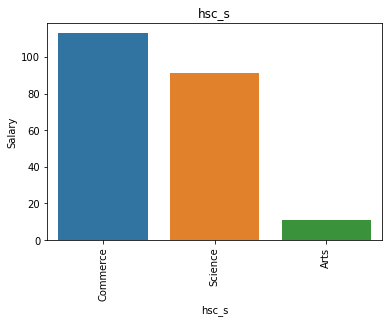

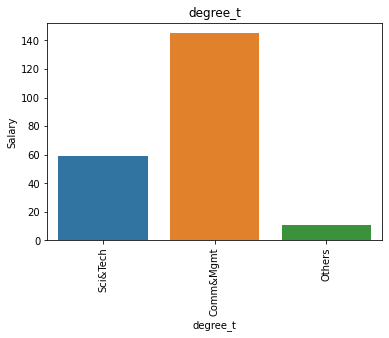

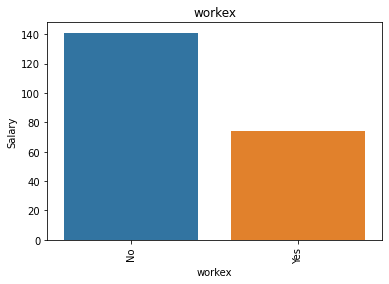

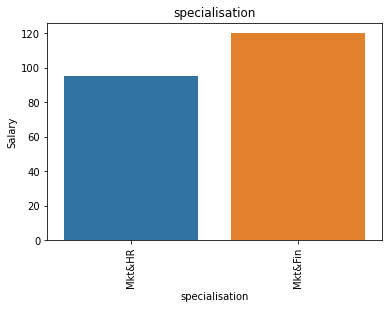

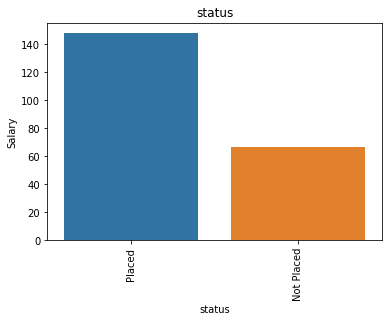

In [16]:
for x in categorical_columns:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(data[x],data=data);
    plt.xlabel(x)
    plt.ylabel('Salary')
    plt.title(x)
    plt.xticks(rotation=90)

In [17]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [18]:
### Dropped unimportant columns

data.drop(['sl_no'],axis = 1, inplace=True)

## Relationships of Percentages with respect to Salary.

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


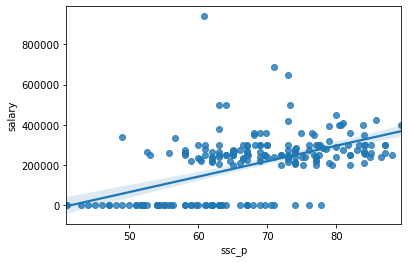

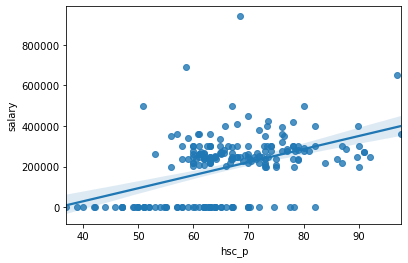

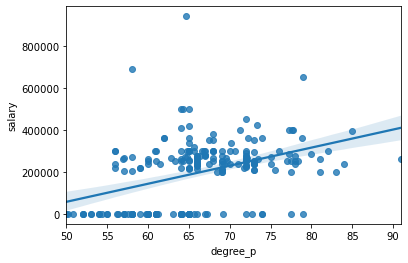

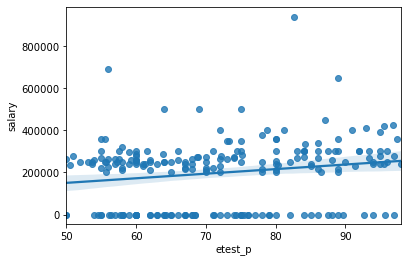

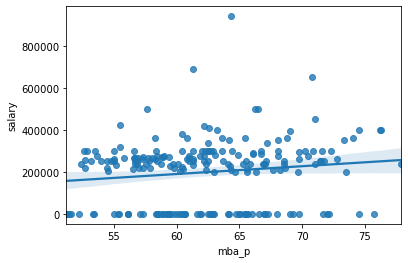

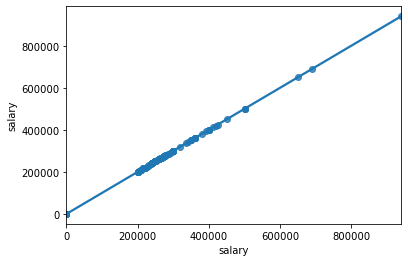

In [19]:
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()
print(numerical_columns)
for x in numerical_columns:
    plt.figure()
    sns.regplot(x=data[x], y=data['salary'], data=data);

### Boxplot of numerical data to check the outliers

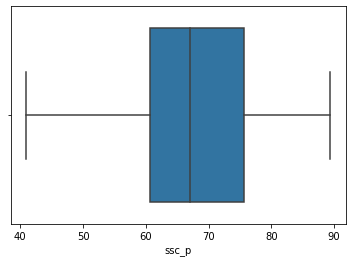

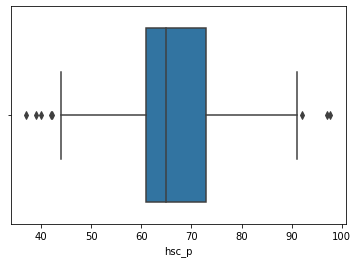

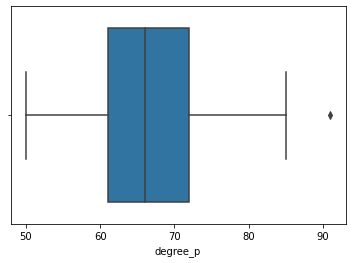

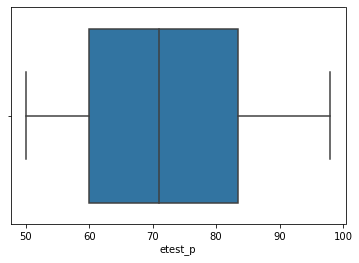

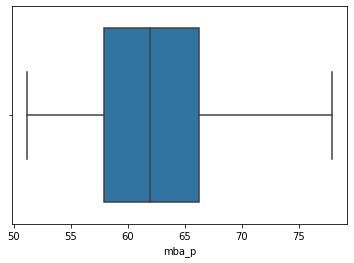

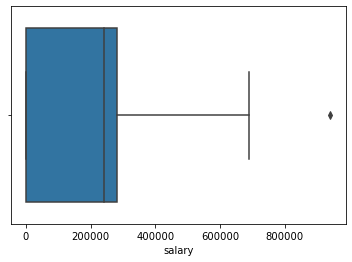

In [20]:
for x in numerical_columns:
    plt.figure()
    sns.boxplot(data[x]);

In [21]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [22]:
## Remove Outliers From Salary Columns
data = data[data['salary'] != 940000.0 ] 

In [23]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,67.333785,66.323505,66.378458,72.051215,62.268551,195238.317757
std,10.843397,10.922138,7.374995,13.287308,5.845347,146552.508589
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.550000,60.850000,61.000000,60.000000,57.922500,0.000000
50%,67.000000,65.000000,66.000000,70.500000,61.950000,240000.000000
75%,75.850000,73.000000,72.000000,83.750000,66.267500,280000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,690000.000000


In [24]:
## Encoding Categorical Columns
categorical_columns

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [25]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Encoding Categorical Columns

In [26]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
data['gender'] = le_gender.fit_transform(data['gender'])
print('gender',data['gender'].unique())

le_ssc_b = LabelEncoder()
data['ssc_b'] = le_ssc_b.fit_transform(data['ssc_b'])
print('ssc_b',data['ssc_b'].unique())

le_hsc_b = LabelEncoder()
data['hsc_b'] = le_hsc_b.fit_transform(data['hsc_b'])
print('hsc_b',data['hsc_b'].unique())

le_hsc_s = LabelEncoder()
data['hsc_s']  = le_hsc_s.fit_transform(data['hsc_s'])
print('hsc_s',data['hsc_s'].unique())

le_degree_t = LabelEncoder()
data['degree_t']  = le_degree_t.fit_transform(data['degree_t'])
print('degree_t',data['degree_t'].unique())

le_workex = LabelEncoder()
data['workex']  = le_workex.fit_transform(data['workex'])
print('workex',data['workex'].unique())

le_specialisation = LabelEncoder()
data['specialisation']  = le_specialisation.fit_transform(data['specialisation'])
print('specialisation',data['specialisation'].unique())

le_status = LabelEncoder()
data['status']  = le_status.fit_transform(data['status'])
print('status',data['status'].unique())


gender [1 0]
ssc_b [1 0]
hsc_b [1 0]
hsc_s [1 2 0]
degree_t [2 0 1]
workex [0 1]
specialisation [1 0]
status [1 0]


## Split data into trianing and testing

In [27]:
X = data.drop('salary', axis = 1)
y = data['salary']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [29]:
## Feature Importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

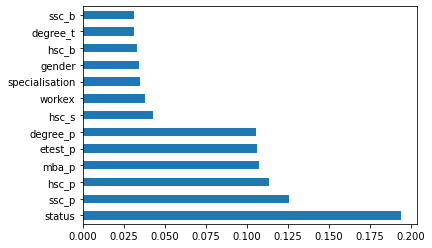

In [30]:
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(13).plot(kind='barh')
plt.show()

## Machine Learning Models

In [31]:
LinearRegression_Model = LinearRegression()
DecisionTreeRegression_Model = DecisionTreeRegressor()
RandomForestRegression_Model = RandomForestRegressor()
Xgboost_Model = xgb.XGBRegressor()
Ridge_Model =  Ridge()
Lasso_Model = Lasso()
ElasticNet_Model = ElasticNet()

ml_models = [LinearRegression_Model, DecisionTreeRegression_Model, RandomForestRegression_Model, Xgboost_Model, Ridge_Model, Lasso_Model, ElasticNet_Model]

In [32]:
best_accuracies = 0.0
best_regressor = 0

model_dict = {0:'LinearRegression', 1: 'DecisionTreeRegressor', 2: 'RandomForestRegressor', 3:'XgboostRegressor',4:'RidgeRegression',5:'LassoRegression',6:'ElsticNetRegression'}

In [33]:
for model in ml_models:
    model.fit(X_train, y_train)

LinearRegression 0.8740998137836392


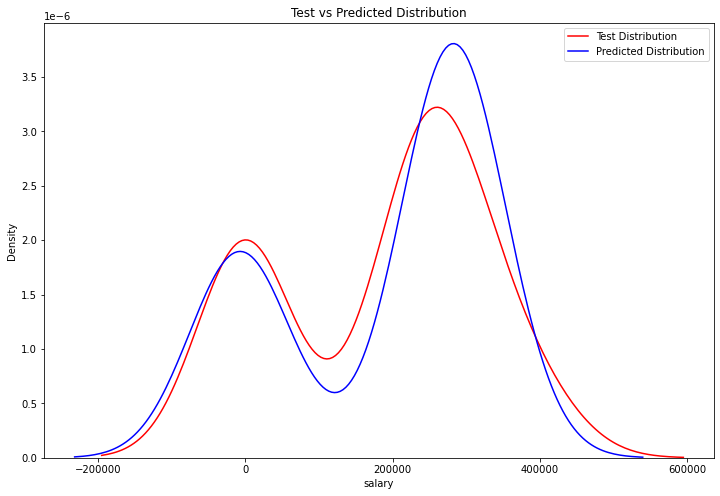

DecisionTreeRegressor 0.6340549156127951


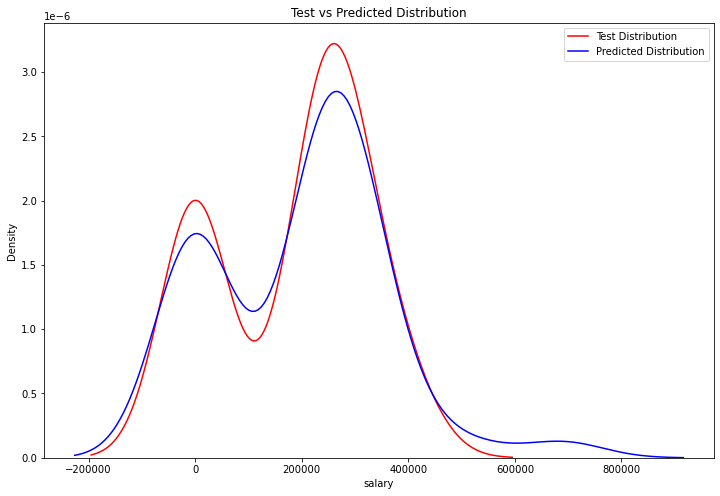

RandomForestRegressor 0.8935045818271108


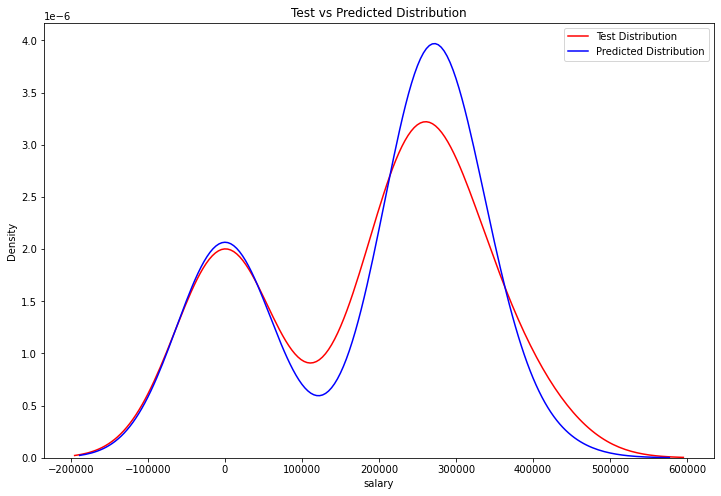

XgboostRegressor 0.87796032565742


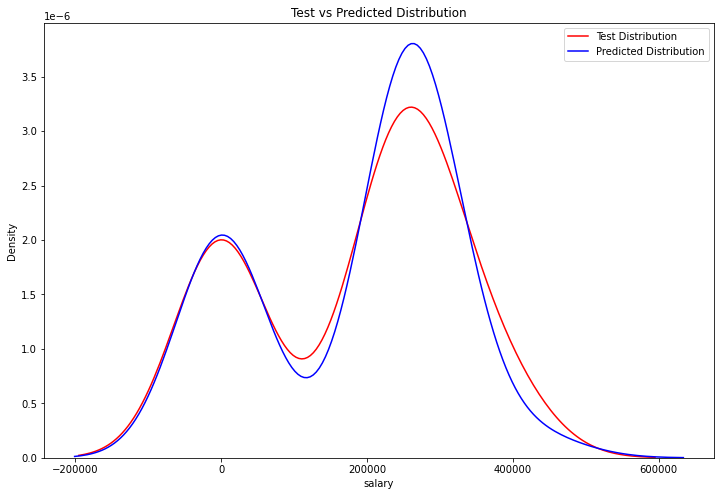

RidgeRegression 0.8766691372526385


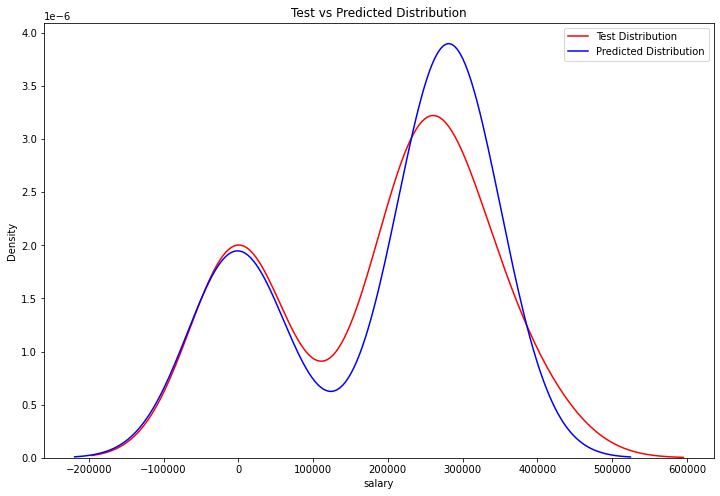

LassoRegression 0.8741130644496142


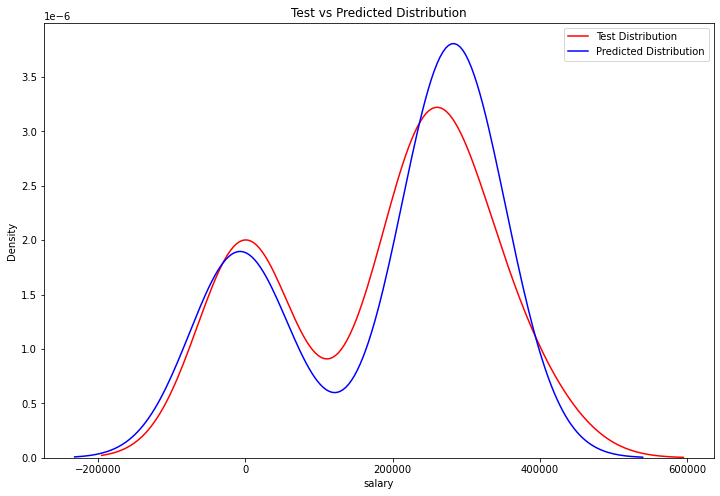

ElsticNetRegression 0.5729169793713619


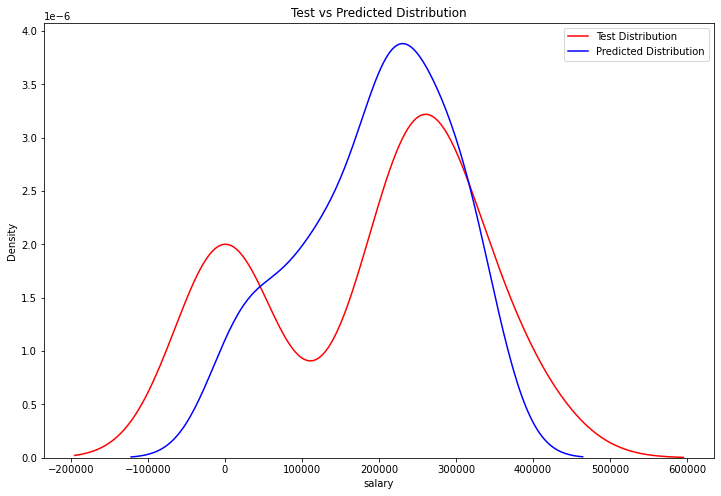

In [34]:
for i, models in enumerate(ml_models):
    y_pred = models.predict(X_test)
    print( model_dict[i],models.score(X_test, y_test))
    plt.figure(figsize=(12,8))
    ax1 = sns.distplot(y_test, color='r', hist=False, label='Test Distribution')
    ax2 = sns.distplot(y_pred, color='b', hist=False, label= 'Predicted Distribution')
    plt.legend()
    plt.title('Test vs Predicted Distribution')
    plt.show()

In [35]:
for i, models in enumerate(ml_models):
    print('Cross Validation Score of',model_dict[i],'is', (cross_val_score(models,X,y,cv=10)).mean()) 

Cross Validation Score of LinearRegression is 0.8122363395459828
Cross Validation Score of DecisionTreeRegressor is 0.5977463985986903
Cross Validation Score of RandomForestRegressor is 0.8098283420553445
Cross Validation Score of XgboostRegressor is 0.7816341600215869
Cross Validation Score of RidgeRegression is 0.8128762781420746
Cross Validation Score of LassoRegression is 0.8122453211013759
Cross Validation Score of ElsticNetRegression is 0.5470332091450968


In [36]:
for i, models in enumerate(ml_models):
    y_pred = models.predict(X_test)
    print( model_dict[i],np.sqrt(mean_squared_error(y_test, y_pred))) 

LinearRegression 48406.617421401446
DecisionTreeRegressor 82527.65568879545
RandomForestRegressor 44520.19021982389
XgboostRegressor 47658.68660009242
RidgeRegression 47910.139394096
LassoRegression 48404.070019306426
ElsticNetRegression 89155.41019631825


# Hyperparameter Optimization of Models

In [37]:
## Metric Function

## Metrics Functions

In [38]:
def metric(y_test, y_pred):
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import median_absolute_error
    
    mean_error = mean_squared_error(y_test, y_pred)
    root_mean_squared_error = np.sqrt(mean_error)
    score = r2_score(y_test, y_pred)
    absolute_error = mean_absolute_error(y_test, y_pred)
    median_error = median_absolute_error(y_test, y_pred)
    
    print('Mean-Squared-Error:{}'.format(mean_error))
    print('Root-Mean-Squared-Error:{}'.format(root_mean_squared_error))
    print('Score:{}'.format(score))
    print('Absolute Error:{}'.format(absolute_error))
    print('Median-Absolute-Error:{}'.format(median_error))
    
    plt.figure(figsize=(12,8))
    ax1 = sns.distplot(y_test, color='r', hist=False, label='Test Distribution')
    ax2 = sns.distplot(y_pred, color='b', hist=False, label= 'Predicted Distribution')
    plt.legend()
    plt.title('Test vs Predicted Distribution')
    plt.show()

## Hyperparameter Optimization of Linear Regression Model

In [39]:
def multiple_regression(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import GridSearchCV
    regressor = LinearRegression()
    
    ## Parameters to tune
    print('Parameters to be tune:{}'.format(LinearRegression().get_params().keys()))
    
    params = {"copy_X":[True, False],
             "fit_intercept":[True, False],
             "normalize":[True,False]}
    grid = GridSearchCV(regressor, params, cv=5, scoring='r2',n_jobs=-1)
    grid.fit(x_train, y_train)
    y_pred = grid.predict(x_test)
    
    print('Best Hyperparameters Used:{}'.format(grid.best_params_))
    
    result = metric(y_test, y_pred)
    
    

Parameters to be tune:dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])
Best Hyperparameters Used:{'copy_X': True, 'fit_intercept': False, 'normalize': True}
Mean-Squared-Error:2544635794.8108363
Root-Mean-Squared-Error:50444.38318396644
Score:0.8632766998150329
Absolute Error:37813.43449957871
Median-Absolute-Error:22084.349016534557


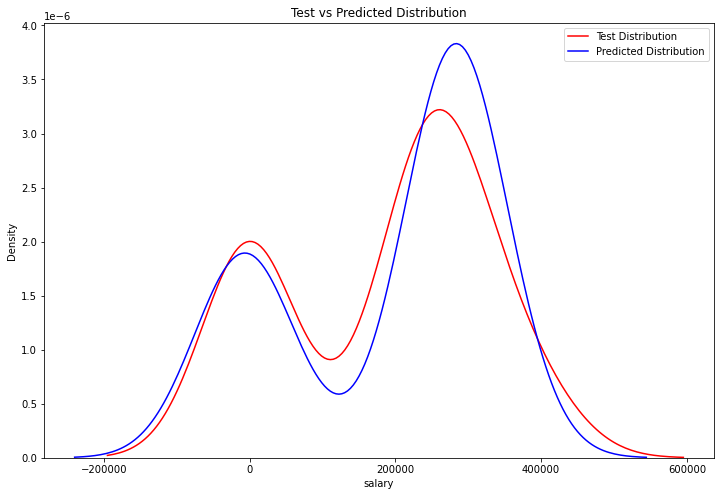

In [40]:
multiple_regression(X_train, X_test, y_train, y_test)

## Hyperparameter Optimization of Decision Tree Regressor

In [41]:
def decision_tree(x_train, x_test, y_train, y_test):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.model_selection import GridSearchCV
    
    regressor = DecisionTreeRegressor()
    
    ## Parameters to be tune
    print('Hyper-Parameters to be tune: {}'.format(DecisionTreeRegressor().get_params()))
    
    ## Setting and tuning the hyperparameters
    
    params = {"criterion":['mse','mae'],
             "min_samples_split":[10,20,30,40],
             "max_depth":[2,4,6,8],
             "min_samples_leaf":[20, 40,60,100],
             "max_leaf_nodes":[5,10,20,30]}
    grid = GridSearchCV(regressor, params, cv=5)
    grid.fit(x_train, y_train)
    y_pred = grid.predict(x_test)
    
    ## Displaying the best hyperparameters used
    print("Best Hyper-Parameters used : {}".format(grid.best_params_))
    
    ## Setting the Metrics
    result = metric(y_test, y_pred)

Hyper-Parameters to be tune: {'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Best Hyper-Parameters used : {'criterion': 'mse', 'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}
Mean-Squared-Error:2294018716.7072735
Root-Mean-Squared-Error:47895.915449099346
Score:0.8767423572859009
Absolute Error:32959.7974230699
Median-Absolute-Error:25029.411764705874


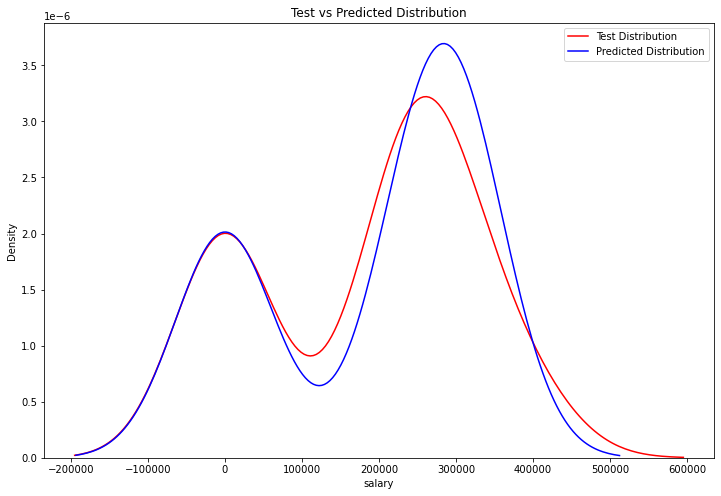

In [42]:
decision_tree(X_train, X_test, y_train, y_test)

## Hyperparameter Optimization of Random Forest Regressor

In [43]:
def random_forest(x_train, x_test, y_train, y_test):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV
    
    regressor = RandomForestRegressor()
    
    ## Parameters to be tune
    print('Hyper-Parameters to be tune: {}'.format(RandomForestRegressor().get_params()))
    
    ## Setting and tuning the hyperparameters
    
    params = {"n_estimators":[10,20,30,40],
             "max_features":['auto', 'log2', 'sqrt'],
             "bootstrap":[True, False]}
    grid = GridSearchCV(regressor, params, cv=5)
    grid.fit(x_train, y_train)
    y_pred = grid.predict(x_test)
    
    ## Displaying the best hyperparameters used
    print("Best Hyper-Parameters used : {}".format(grid.best_params_))
    
    ## Setting the Metrics
    result = metric(y_test, y_pred)

Hyper-Parameters to be tune: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best Hyper-Parameters used : {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 20}
Mean-Squared-Error:2597706104.6511626
Root-Mean-Squared-Error:50967.6966779073
Score:0.8604252316725172
Absolute Error:33631.395348837206
Median-Absolute-Error:22350.0


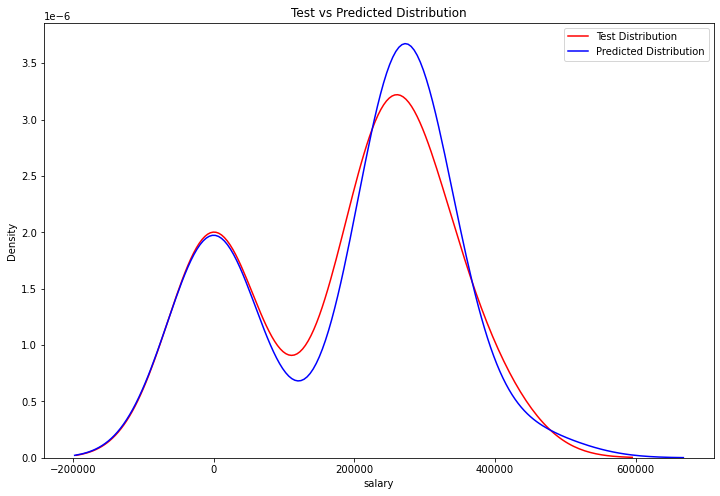

In [44]:
random_forest(X_train, X_test, y_train, y_test)

## Hyperparameter of XGBoost Regressor Model

In [45]:
def XGBoost(x_train, x_test, y_train, y_test):
    from xgboost import XGBRegressor
    from sklearn.model_selection import GridSearchCV
    import warnings
    warnings.filterwarnings("ignore")
    
    regressor = XGBRegressor()
    
    ## Parameters to be tune
    print('Hyper-Parameters to be tune: {}'.format(XGBRegressor().get_params()))
    
    ## Setting and tuning the hyperparameters
    
    params = {"nthread":[3],
             "learning_rate":[0.01, 0.03, 0.05, 0.06],
             "max_depth":[4,5,6,8],
             "min_child_weight":[4],
             "subsample":[0.7],
             "colsample_bytree":[0.7],
             "n_estimators":[500]}
    grid = GridSearchCV(regressor, params, cv=5)
    grid.fit(x_train, y_train)
    y_pred = grid.predict(x_test)
    
    ## Displaying the best hyperparameters used
    print("Best Hyper-Parameters used : {}".format(grid.best_params_))
    
    ## Setting the Metrics
    result = metric(y_test, y_pred)

Hyper-Parameters to be tune: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'gamma': None, 'gpu_id': None, 'importance_type': 'gain', 'interaction_constraints': None, 'learning_rate': None, 'max_delta_step': None, 'max_depth': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Best Hyper-Parameters used : {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 3, 'subsample': 0.7}
Mean-Squared-Error:2030384249.279339
Root-Mean-Squared-Error:45059.78527777667
Score:0.890907439182005
Absolute Error:32797.74565656795
Median-Absolute-Error:28044.30078125


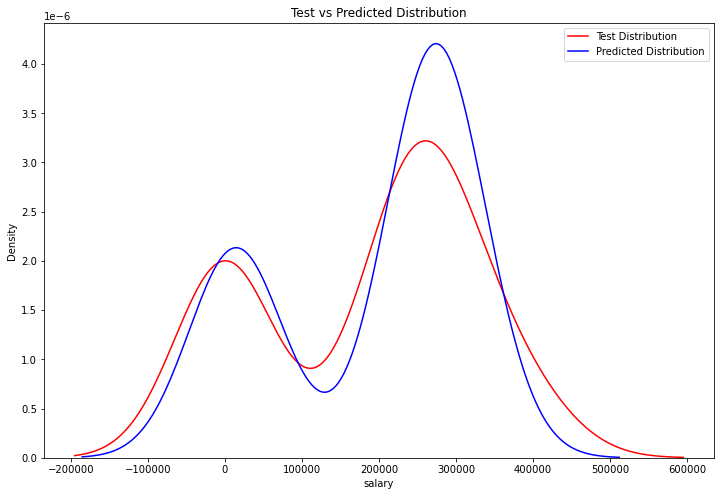

In [46]:
XGBoost(X_train, X_test, y_train, y_test)

In [47]:
model  =  xgb.XGBRegressor(colsample_bytree= 0.7, learning_rate = 0.01, max_depth= 4, min_child_weight= 4, n_estimators=500, nthread= 3, subsample= 0.7)

In [48]:
X_test_ = X_test.values
X_train_ = X_train.values

In [49]:
model.fit(X_train_,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=3, nthread=3, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [50]:
y_pred = model.predict(X_test_)

In [51]:
score = model.score(X_test_, y_test)

In [52]:
score

0.890907439182005

## Test Model

In [53]:
X_test.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

In [54]:
X = np.array([['M',67.0,'Others',91.0,'Others','Commerce',58.0,'Sci&Tech','No',55.0,'Mkt&Fin',58.80,'Placed']])
X

array([['M', '67.0', 'Others', '91.0', 'Others', 'Commerce', '58.0',
        'Sci&Tech', 'No', '55.0', 'Mkt&Fin', '58.8', 'Placed']],
      dtype='<U32')

In [55]:
categorical_columns


['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [56]:
X[:,0] = le_gender.transform(X[:,0])
X[:,2] = le_ssc_b.transform(X[:,2])
X[:,4] = le_hsc_b.transform(X[:,4])
X[:,5] = le_hsc_s.transform(X[:,5])
X[:,7] = le_degree_t.transform(X[:,7])
X[:,8] = le_workex.transform(X[:,8])
X[:,10] = le_specialisation.transform(X[:,10])
X[:,12] = le_status.transform(X[:,12])

X = X.astype(float)
X

array([[ 1. , 67. ,  1. , 91. ,  1. ,  1. , 58. ,  2. ,  0. , 55. ,  0. ,
        58.8,  1. ]])

In [57]:
y_pred = model.predict(X)
y_pred

array([330216.8], dtype=float32)

## Saved the Model in Pickle Format

In [58]:
import pickle

In [59]:
data = {"model":model,"le_gender": le_gender, "le_ssc_b":le_ssc_b, "le_hsc_b":le_hsc_b, "le_hsc_s":le_hsc_s,"le_degree_t":le_degree_t,"le_workex":le_workex,"le_specialisation":le_specialisation,"le_status":le_status}
with open('xgboost_model.pkl','wb') as file:
    pickle.dump(data,file)

In [60]:
with open('xgboost_model.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data['model']
le_gender = data['le_gender']
le_ssc_b = data['le_ssc_b']
le_hsc_b = data['le_hsc_b']
le_hsc_s = data['le_hsc_s']
le_degree_t = data['le_degree_t']
le_workex = data['le_workex']
le_specialisation = data['le_specialisation']
le_status = data['le_status']



In [61]:
y_pred = regressor_loaded.predict(X)

In [62]:
y_pred

array([330216.8], dtype=float32)